In [35]:
#Librerias necesarias + previsualizacion (skimage+inline)
import dnaplotlib as dpl
from pylab import *
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline 

In [36]:
# Funcion para generar colores mas claros
def lighten_color (col, fac):
    r = col[0] + (fac*(1.0-col[0]))
    g = col[1] + (fac*(1.0-col[1]))
    b = col[2] + (fac*(1.0-col[2]))
    return (r,g,b)

In [76]:
# Graficar el grafico de barras de la izq

fig = plt.figure(figsize=(3.7,2.32))
ax = plt.axes([0.08, 0.14, 0.21, 0.80])
ax.set_xscale('log')
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', which='major', pad=3)
reu_to_rpu = 1.0/4.2
val = [2.5, 0.008, 0.012, 2.5]
val = [x*reu_to_rpu for x in val]
pos = arange(4)+.5
barlist=ax.barh(pos,val,0.3, align='center', log=True)
barlist[0].set_color('black')
barlist[0].set_facecolor('black')
barlist[1].set_color('black')
barlist[1].set_facecolor('white')
barlist[2].set_color('black')
barlist[2].set_facecolor('white')
barlist[3].set_color('black')
barlist[3].set_facecolor('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.set_xlim([0.005/4.2,10/4.2])
ax.set_ylim([-0.1,3.9])

#Sobre el texto del grafico

plt.yticks(pos, ('+/+', '-/+', '+/-', '-/-'))
plt.xlabel('Output (RPU)', fontsize=8, labelpad=0)
plt.ylabel('Input', fontsize=8, labelpad=-1)
plt.grid(False)


# Mapa de colores
col_map = {}
col_map['black']   = (0.00, 0.00, 0.00)
col_map['white']   = (1.00, 1.00, 1.00)
col_map['red']     = (0.95, 0.30, 0.25)
col_map['green']   = (0.38, 0.82, 0.32)
col_map['blue']    = (0.38, 0.65, 0.87)
col_map['orange']  = (1.00, 0.75, 0.17)

# ancho de linea global
lw = 1

# Definir las partes...aqui se definen los CDS

g0_OFF = {'type':'CDS', 'name':'g0_OFF', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['white'], 'edge_color':col_map['black'], 'x_extent':24}} #output
g0_ON  = {'type':'CDS', 'name':'g0_ON',  'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['black'], 'edge_color':col_map['black'], 'x_extent':24, 'label':'Out', 'label_style':'italic', 'label_color':(1,1,1), 'label_x_offset':-3, 'label_y_offset':-1}}
g1_OFF = {'type':'CDS', 'name':'g1_OFF', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['white'], 'edge_color':col_map['red'], 'x_extent':24}}
g1_ON  = {'type':'CDS', 'name':'g1_ON',  'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['red'], 'edge_color':col_map['red'], 'x_extent':24, 'label':'D', 'label_style':'italic', 'label_color':(1,1,1), 'label_x_offset':-3, 'label_y_offset':-1}}
g2_OFF = {'type':'CDS', 'name':'g2_OFF', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['white'], 'edge_color':col_map['blue'], 'x_extent':24}}
g2_ON  = {'type':'CDS', 'name':'g2_ON',  'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['blue'], 'edge_color':col_map['blue'], 'x_extent':24, 'label':'C', 'label_style':'italic', 'label_color':(1,1,1), 'label_x_offset':-3, 'label_y_offset':-1}}
g3_OFF = {'type':'CDS', 'name':'g3_OFF', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['white'], 'edge_color':col_map['green'], 'x_extent':24}}
g3_ON  = {'type':'CDS', 'name':'g3_ON',  'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['green'], 'edge_color':col_map['green'], 'x_extent':24, 'label':'B', 'label_style':'italic', 'label_color':(1,1,1), 'label_x_offset':-3, 'label_y_offset':-1}}
g4_OFF = {'type':'CDS', 'name':'g4_OFF', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['white'], 'edge_color':col_map['orange'], 'x_extent':24}}
g4_ON  = {'type':'CDS', 'name':'g4_ON',  'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['orange'], 'edge_color':col_map['orange'], 'x_extent':24, 'label':'A', 'label_style':'italic', 'label_color':(1,1,1), 'label_x_offset':-3, 'label_y_offset':-1}}

# Definir las partes...aqui se definen los promotores

pA = {'type':'Promoter', 'name':'pA', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['black'], 'label':'p1', 'label_y_offset':-8}}
pB = {'type':'Promoter', 'name':'pB', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['black'], 'label':'p2', 'label_y_offset':-8}}
p1 = {'type':'Promoter', 'name':'p3', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['red']}}
p2 = {'type':'Promoter', 'name':'p4', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['blue']}}
p3 = {'type':'Promoter', 'name':'p5', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['green']}}
# Aca se definio dos veces el promotor naranjo por que tienen una barra de interaccion
p4_1 = {'type':'Promoter', 'name':'p6', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['orange']}}
p4_2 = {'type':'Promoter', 'name':'p6', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['orange']}}

# Que tanto aclarar los colores
off_fac = 0.7

# Solo para ver como quedan los colores despues de aclararlos
#print('black', lighten_color(col_map['black'],off_fac))
#print('red', lighten_color(col_map['red'],off_fac))
#print('green', lighten_color(col_map['green'],off_fac))
#print('blue', lighten_color(col_map['blue'],off_fac))
#print('orange', lighten_color(col_map['orange'],off_fac))

#Definiendo los promotores en su estado de apagado

pA_OFF = {'type':'Promoter', 'name':'pA', 'fwd':True, 'opts':{'linewidth':lw, 'color':lighten_color(col_map['black'],off_fac)}}
pB_OFF = {'type':'Promoter', 'name':'pB', 'fwd':True, 'opts':{'linewidth':lw, 'color':lighten_color(col_map['black'],off_fac)}}
p1_OFF = {'type':'Promoter', 'name':'p3', 'fwd':True, 'opts':{'linewidth':lw, 'color':lighten_color(col_map['red'],off_fac)}}
p2_OFF = {'type':'Promoter', 'name':'p4', 'fwd':True, 'opts':{'linewidth':lw, 'color':lighten_color(col_map['blue'],off_fac)}}
p3_OFF = {'type':'Promoter', 'name':'p5', 'fwd':True, 'opts':{'linewidth':lw, 'color':lighten_color(col_map['green'],off_fac)}}
p4_1_OFF = {'type':'Promoter', 'name':'p6', 'fwd':True, 'opts':{'linewidth':lw, 'color':lighten_color(col_map['orange'],off_fac)}}
p4_2_OFF = {'type':'Promoter', 'name':'p6', 'fwd':True, 'opts':{'linewidth':lw, 'color':lighten_color(col_map['orange'],off_fac)}}

#Definiendo terminadores

t0 = {'type':'Terminator', 'name':'t0', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['black'], 'start_pad':-1}}
t1 = {'type':'Terminator', 'name':'t1', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['black'], 'start_pad':-1}}
t2 = {'type':'Terminator', 'name':'t2', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['black'], 'start_pad':-1}}
t3 = {'type':'Terminator', 'name':'t3', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['black'], 'start_pad':-1}}
t4 = {'type':'Terminator', 'name':'t4', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['black'], 'start_pad':-1}}

# Definiendo RBS

u0 = {'type':'RBS', 'name':'u0', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['black'], 'start_pad':-6, 'x_extent':6}}
u1 = {'type':'RBS', 'name':'u1', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['black'], 'start_pad':-6, 'x_extent':6}}
u2 = {'type':'RBS', 'name':'u2', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['black'], 'start_pad':-6, 'x_extent':6}}
u3 = {'type':'RBS', 'name':'u3', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['black'], 'start_pad':-6, 'x_extent':6}}
u4 = {'type':'RBS', 'name':'u4', 'fwd':True, 'opts':{'linewidth':lw, 'color':col_map['black'], 'start_pad':-6, 'x_extent':6}}

# Diginiendo tipo de regulacion
# Standard regulatory types   ['Repression', 'Activation', 'Connection']
arc1 = {'type':'Repression', 'from_part':g1_ON, 'to_part':p1_OFF, 'opts':{'color':col_map['red'],    'linewidth':lw}}
arc2 = {'type':'Repression', 'from_part':g2_ON, 'to_part':p2_OFF, 'opts':{'color':col_map['blue'],   'linewidth':lw}}
arc3 = {'type':'Repression', 'from_part':g3_ON, 'to_part':p3_OFF, 'opts':{'color':col_map['green'],  'linewidth':lw, 'arc_height':25}}
arc4 = {'type':'Repression', 'from_part':g4_ON, 'to_part':p4_1_OFF, 'opts':{'color':col_map['orange'], 'linewidth':lw, 'arc_height':20}}
arc5 = {'type':'Repression', 'from_part':g4_ON, 'to_part':p4_2_OFF, 'opts':{'color':col_map['orange'], 'linewidth':lw, 'arc_height':20}}

reg1 = [arc2, arc3]
reg2 = [arc1, arc2, arc4, arc5]
reg3 = [arc1, arc3, arc4, arc5]
reg4 = [arc2, arc3, arc4, arc5]

# Diseno con las partes correspondientes en su orden
design1 = [pA_OFF, pB_OFF, u4, g4_OFF, t4,  pB_OFF, p4_1, u3, g3_ON,  t3,  pA_OFF, p4_2, u2, g2_ON,  t2,  p3_OFF, p2_OFF, u1, g1_OFF, t1,  p1, u0, g0_ON,  t0]
design2 = [pA, pB_OFF, u4, g4_ON,  t4,  pB_OFF, p4_1_OFF, u3, g3_OFF, t3,  pA, p4_2_OFF, u2, g2_ON,  t2,  p3, p2_OFF, u1, g1_ON,  t1,  p1_OFF, u0, g0_OFF, t0]
design3 = [pA_OFF, pB, u4, g4_ON,  t4,  pB, p4_1_OFF, u3, g3_ON,  t3,  pA_OFF, p4_2_OFF, u2, g2_OFF, t2,  p3_OFF, p2, u1, g1_ON,  t1,  p1_OFF, u0, g0_OFF, t0]
design4 = [pA, pB, u4, g4_ON,  t4,  pB, p4_1_OFF, u3, g3_ON,  t3,  pA, p4_2_OFF, u2, g2_ON,  t2,  p3_OFF, p2_OFF, u1, g1_OFF, t1,  p1, u0, g0_ON,  t0]

# Preparar los ejes para cada uno de los constructos
ax_dna1 = plt.axes([0.135, 0.75, 1, 0.2]) #x (left->right), y (down ->up)
ax_dna2 = plt.axes([0.135, 0.55, 1, 0.2])
ax_dna3 = plt.axes([0.135, 0.35, 1, 0.2])
ax_dna4 = plt.axes([0.135, 0.15, 1, 0.2])

# Crear el DNAplotlib renderer
dr = dpl.DNARenderer()

# Redender el ADN a los ejes
start, end = dr.renderDNA(ax_dna1, design1, dr.SBOL_part_renderers(), regs=reg1, reg_renderers=dr.std_reg_renderers())
ax_dna1.set_xlim([start, end])
ax_dna1.set_ylim([-27,27])
ax_dna1.set_aspect('equal')
ax_dna1.set_xticks([])
ax_dna1.set_yticks([])
ax_dna1.axis('off')

start, end = dr.renderDNA(ax_dna2, design2, dr.SBOL_part_renderers(), regs=reg2, reg_renderers=dr.std_reg_renderers())
ax_dna2.set_xlim([start, end])
ax_dna2.set_ylim([-27,27])
ax_dna2.set_aspect('equal')
ax_dna2.set_xticks([])
ax_dna2.set_yticks([])
ax_dna2.axis('off')

start, end = dr.renderDNA(ax_dna3, design3, dr.SBOL_part_renderers(), regs=reg3, reg_renderers=dr.std_reg_renderers())
ax_dna3.set_xlim([start, end])
ax_dna3.set_ylim([-27,27])
ax_dna3.set_aspect('equal')
ax_dna3.set_xticks([])
ax_dna3.set_yticks([])
ax_dna3.axis('off')

start, end = dr.renderDNA(ax_dna4, design4, dr.SBOL_part_renderers(), regs=reg4, reg_renderers=dr.std_reg_renderers())
ax_dna4.set_xlim([start, end])
ax_dna4.set_ylim([-27,27])
ax_dna4.set_aspect('equal')
ax_dna4.set_xticks([])
ax_dna4.set_yticks([])
ax_dna4.axis('off')

# Save the figure
fig.savefig('xnor_truthtable.pdf', transparent=True)
fig.savefig('xnor_truthtable.png', dpi=300)

# Clear the plotting cache
plt.close('all')



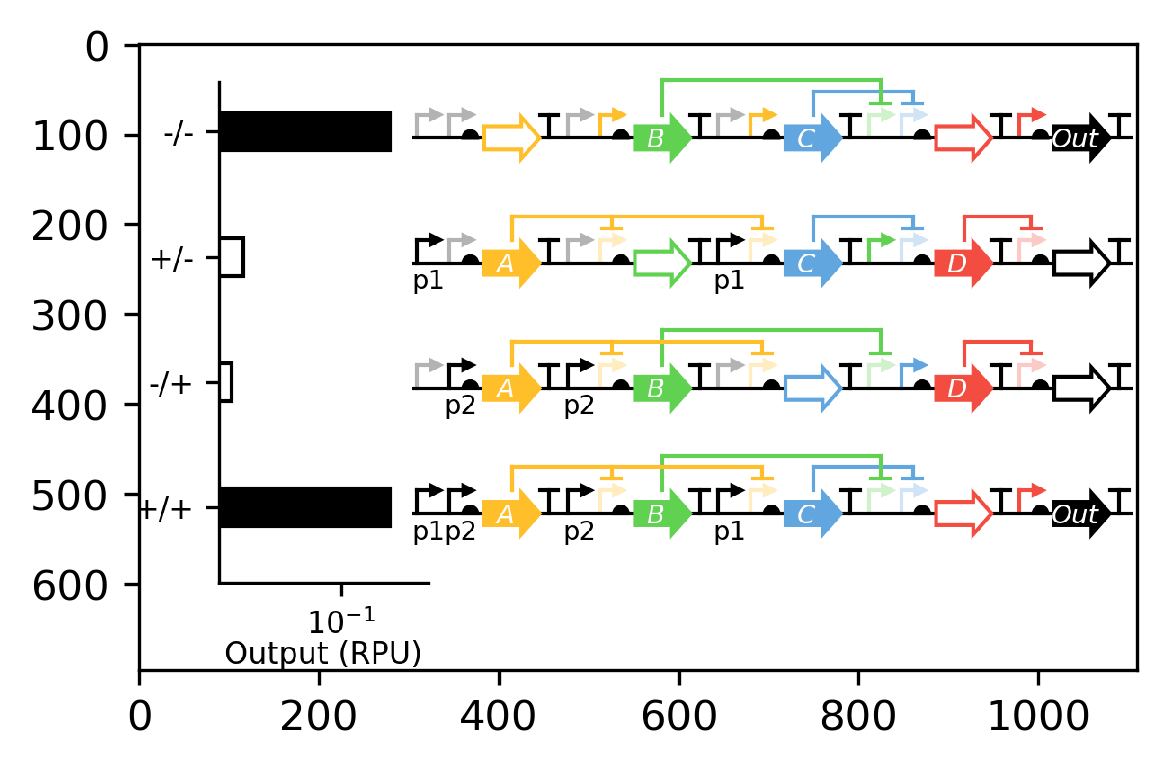

In [77]:
#Solo para ver cambios realizados en el codigo mas rapido
img = io.imread('xnor_truthtable.png')
plt.figure(figsize=(4, 4), dpi=300)
io.imshow(img)